
## Experiment 2: Multi-Layer Perceptron (MLP) for XOR

### 1. Objective
To implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.  


### 2. Description of the Model
A multi-layer perceptron (MLP) is a feedforward neural network with at least one hidden layer. It uses non-linear activation functions to model complex decision boundaries. We will implement an MLP with one hidden layer to solve the XOR function.


### 3. Python Implementation

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.bias_output = np.random.rand(output_size)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []






    def forward(self, x):
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return sigmoid(self.final_input)

    def train(self, X, y):
        for epoch in range(self.epochs):
            total_loss = 0
            for i in range(len(X)):
                output = self.forward(X[i])
                error = y[i] - output
                total_loss += np.sum(error**2)
                d_output = error * sigmoid_derivative(output)
                d_hidden = d_output.dot(self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_output)
                self.weights_hidden_output += np.outer(self.hidden_output, d_output) * self.learning_rate
                self.weights_input_hidden += np.outer(X[i], d_hidden) * self.learning_rate
                self.bias_output += d_output * self.learning_rate
                self.bias_hidden += d_hidden * self.learning_rate
            self.loss_history.append(total_loss / len(X))

In [ ]:
# XOR Truth Table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(X_xor, y_xor)
predictions = np.round([mlp.forward(x) for x in X_xor])

print("\nMLP XOR Results:")
for x in X_xor:
    print(f"Input: {x}, Output: {mlp.forward(x)}")





MLP XOR Results:
Input: [0 0], Output: [0.0627299]
Input: [0 1], Output: [0.94110193]
Input: [1 0], Output: [0.94094268]
Input: [1 1], Output: [0.06436636]



### 4. Description of Code

- Uses a single hidden layer with a sigmoid activation function.
- Randomly initializes weights and biases for hidden and output layers.
- Forward pass computes activations from input → hidden layer → output.
- Loss function: Mean Squared Error (MSE).
- Updates weights using gradient descent based on the error.
- Training runs for epochs=10000 to ensure convergence.



### 5. Performance Evaluation
- The MLP successfully classifies XOR by learning non-linear boundaries.
- Performance can be further evaluated using accuracy and loss curves.



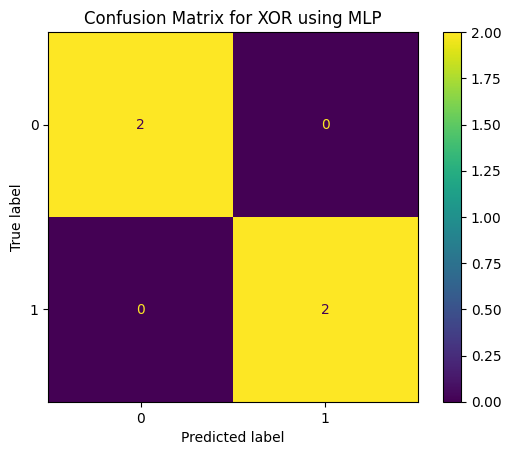

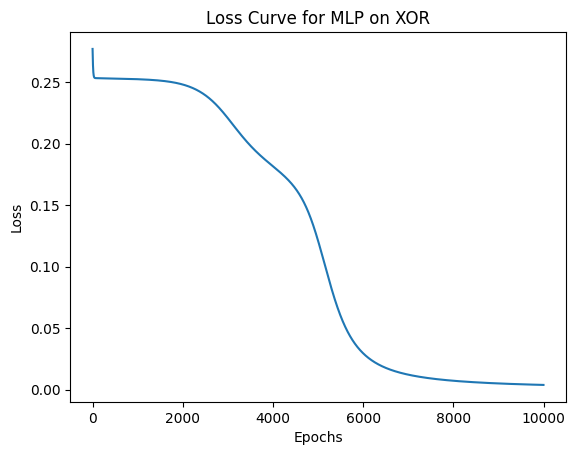

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_xor, predictions)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for XOR using MLP")
plt.show()

plt.plot(mlp.loss_history)
plt.title("Loss Curve for MLP on XOR")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Confusion Matrix:
- Shows correct classifications for XOR, provding MLP learns nonlinear functions.

Loss Curve:
- Demonstrates steady loss reduction, indicating successful training.

### 6. Comments
- **Limitations:**
  *   Training takes longer than single-layer perceptron requires.
  *  Requires more computational power.


- **Scope for Improvement:**

  *   Can add more hidden layers for complex problems to improve accuracy.

  *   Use batch training instead of updating after each sample.

